In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Basic
import numpy as np
import pandas as pd
import collections

#Plotting
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#Regular modeling
import folium
import matplotlib
import statsmodels.api as sm
from itertools import groupby
from operator import itemgetter
from math import sqrt

#Extended modeling
import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import metrics, mixture, cluster, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF

from mlxtend.preprocessing import minmax_scaling

import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

## Basic EDA

In [ ]:
df_governors = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/governors_county_candidate.csv')
df_president = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_county_candidate.csv')
df_senate = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/senate_county_candidate.csv')

print("The number of rows for senate: " + format(df_senate.shape[0]) + ". The number of factors: " + format(df_senate.shape[1]))
print("The number of rows for president: " + format(df_president.shape[0]) + ". The number of factors: " + format(df_president.shape[1]))
print("The number of rows for governors: " + format(df_governors.shape[0]) + ". The number of factors: " + format(df_governors.shape[1]))

The number of rows for senate: 14125. The number of factors: 5
The number of rows for president: 32177. The number of factors: 6
The number of rows for governors: 5145. The number of factors: 6


In [ ]:
df_governors.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [ ]:
df_senate.head()

,state,county,candidate,party,total_votes
0,Delaware,Kent County,Lauren Witzke,REP,38571
1,Delaware,Kent County,Mark Turley,IPD,1553
2,Delaware,Kent County,Nadine Frost,LIB,958
3,Delaware,New Castle County,Lauren Witzke,REP,80081
4,Delaware,New Castle County,Mark Turley,IPD,4277


In [ ]:
df_president.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [ ]:

df = pd.merge(df_president, df_senate, on=['state', 'county'],how='left')
df = pd.merge(df, df_governors, on=['state', 'county'],how='left')

In [ ]:
df.head()

,state,county,candidate_x,party_x,total_votes_x,won_x,candidate_y,party_y,total_votes_y,candidate,party,votes,won_y
0,Delaware,Kent County,Joe Biden,DEM,44552,True,Lauren Witzke,REP,38571.0,John Carney,DEM,44352.0,True
1,Delaware,Kent County,Joe Biden,DEM,44552,True,Lauren Witzke,REP,38571.0,Julianne Murray,REP,39332.0,False
2,Delaware,Kent County,Joe Biden,DEM,44552,True,Lauren Witzke,REP,38571.0,Kathy DeMatteis,IPD,1115.0,False
3,Delaware,Kent County,Joe Biden,DEM,44552,True,Lauren Witzke,REP,38571.0,John Machurek,LIB,616.0,False
4,Delaware,Kent County,Joe Biden,DEM,44552,True,Mark Turley,IPD,1553.0,John Carney,DEM,44352.0,True



Let's look at presidential one:

In [ ]:

df_president.head(5)

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [ ]:
df_president_agg_REP  = df_president[(df_president.party == "REP")]
df_president_agg_DEM  = df_president[(df_president.party == "DEM")]
#df_president_agg_LIB  = df_president[(df_president.party == "LIB")]
df_president_agg_REP = pd.DataFrame(df_president_agg_REP.groupby(['state', 'county'])['total_votes'].sum())
df_president_agg_DEM = pd.DataFrame(df_president_agg_DEM.groupby(['state', 'county'])['total_votes'].sum())
#df_president_agg_LIB = pd.DataFrame(df_president_agg_LIB.groupby(['state', 'county'])['total_votes'].sum())
df_president_agg_REP = df_president_agg_REP.rename(columns={"total_votes": "votes REP president"})
df_president_agg_DEM = df_president_agg_DEM.rename(columns={"total_votes": "votes DEM president"})
#df_president_agg_LIB = df_president_agg_LIB.rename(columns={"total_votes": "votes LIB president"})


df_president_agg = pd.merge(df_president_agg_DEM, df_president_agg_REP, on=['state', 'county'], how='left')

#df_president_agg = pd.merge(df_president_agg, df_president_agg_LIB, on=['state'], how='left')

df_president_agg.head()


votes DEM president  votes REP president
state   county                                                  
Alabama Autauga County                 7503                19838
        Baldwin County                24578                83544
        Barbour County                 4816                 5622
        Bibb County                    1986                 7525
        Blount County                  2640                24711

In [ ]:
df_senate_agg_REP  = df_senate[(df_senate.party == "REP")]
df_senate_agg_DEM  = df_senate[(df_senate.party == "DEM")]
df_senate_agg_REP = pd.DataFrame(df_senate_agg_REP.groupby(['state', 'county'])['total_votes'].sum())
df_senate_agg_DEM = pd.DataFrame(df_senate_agg_DEM.groupby(['state', 'county'])['total_votes'].sum())
df_senate_agg_REP = df_senate_agg_REP.rename(columns={"total_votes": "votes REP senate"})
df_senate_agg_DEM = df_senate_agg_DEM.rename(columns={"total_votes": "votes DEM senate"})
df_senate_agg = pd.merge(df_senate_agg_DEM, df_senate_agg_REP, on=['state', 'county'],how='outer')


df_governors_agg_REP  = df_governors[(df_governors.party == "REP")]
df_governors_agg_DEM  = df_governors[(df_governors.party == "DEM")]
df_governors_agg_REP = pd.DataFrame(df_governors_agg_REP.groupby(['state', 'county'])['votes'].sum())
df_governors_agg_DEM = pd.DataFrame(df_governors_agg_DEM.groupby(['state', 'county'])['votes'].sum())
df_governors_agg_REP = df_governors_agg_REP.rename(columns={"votes": "votes REP governors"})
df_governors_agg_DEM = df_governors_agg_DEM.rename(columns={"votes": "votes DEM governors"})
df_governors_agg = pd.merge(df_governors_agg_DEM, df_governors_agg_REP, on=['state', 'county'],how='outer')

df = pd.merge(df_president_agg, df_senate_agg, on=['state', 'county'],how='left')
df = pd.merge(df, df_governors_agg, on=['state', 'county'],how='left')
df = df.fillna(0)
df.head(5)

votes DEM president  votes REP president  \
state   county                                                     
Alabama Autauga County                 7503                19838   
        Baldwin County                24578                83544   
        Barbour County                 4816                 5622   
        Bibb County                    1986                 7525   
        Blount County                  2640                24711   

                        votes DEM senate  votes REP senate  \
state   county                                               
Alabama Autauga County            8277.0               0.0   
        Baldwin County           28925.0               0.0   
        Barbour County            5021.0               0.0   
        Bibb County               2244.0               0.0   
        Blount County             3290.0               0.0   

                        votes DEM governors  votes REP governors  
state   county                                                    
Alabama Autauga County                  0.0                  0.0  
        Baldwin County                  0.0                  0.0  
        Barbour County                  0.0                  0.0  
        Bibb County                     0.0                  0.0  
        Blount County                   0.0                  0.0

I will treat state and county as keys. Candidates anyway we know. New data form:

My goal is to have all elections in one data file. I will aggregate data sets in the same way and merge together:

This is the data I would like to continue with. All the information is in the one data set. I have votes for president, senate and governors by the same keys.

# 2.Data enrichment

This was already quite interesting data. But what I can easily do is data enrichment. Thanks to defined key (state & county), I can merge some demographic data. Let's include this census 2017 data set:

In [ ]:
df_census = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/acs2017_county_data.csv')
df_census = df_census.rename(columns={"State": "state","County": "county"})
df_census.head(5)

,CountyId,state,county,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


And define the same keys:

In [ ]:
vars_to_merge = [x for x in df_census.columns if x not in ['CountyId', 'state','county']]

df_census_agg = pd.DataFrame(df_census.groupby(['state', 'county'])[vars_to_merge].sum())
df_census_agg.head(5)

TotalPop    Men   Women  Hispanic  White  Black  \
state   county                                                            
Alabama Autauga County     55036  26899   28137       2.7   75.4   18.9   
        Baldwin County    203360  99527  103833       4.4   83.1    9.5   
        Barbour County     26201  13976   12225       4.2   45.7   47.8   
        Bibb County        22580  12251   10329       2.4   74.6   22.0   
        Blount County      57667  28490   29177       9.0   87.4    1.5   

                        Native  Asian  Pacific  VotingAgeCitizen  ...  Walk  \
state   county                                                    ...         
Alabama Autauga County     0.3    0.9      0.0             41016  ...   0.6   
        Baldwin County     0.8    0.7      0.0            155376  ...   0.8   
        Barbour County     0.2    0.6      0.0             20269  ...   2.2   
        Bibb County        0.4    0.0      0.0             17662  ...   0.3   
        Blount County      0.3    0.1      0.0             42513  ...   0.4   

                        OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                           
Alabama Autauga County          1.3         2.5         25.8     24112   
        Baldwin County          1.1         5.6         27.0     89527   
        Barbour County          1.7         1.3         23.4      8878   
        Bibb County             1.7         1.5         30.0      8171   
        Blount County           0.4         2.1         35.0     21380   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 34 columns]

Okay, merging votes data with demogrpahic data. How much NA's we have now?

In [ ]:
df = pd.merge(df, df_census_agg, on=['state', 'county'],how='left')

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 29.15282 %


Quite a lot. Why? Some small counties, like in Alaska or deeply in dessert where out of this data set. I will keep this structure for time being, but I will make a list of counties which have nulls:

In [ ]:
df_null = df[df.isnull().any(axis=1)]
Null_county = np.array(df_null.index.get_level_values('county'))
Null_county

array(['ED 1', 'ED 10', 'ED 11', ..., 'Woodford', 'Woodstock',
       'Worcester'], dtype=object)

Furthermore, number of votes is nice number but it really makes better sense to rewrite it in percentage form, for example: republican_votes / (all votes). For the moment, I replace all NA's with 0's.

In [ ]:
df['votes REP president perc'] = df['votes REP president']  / (df['votes REP president']+df['votes DEM president'])
df['votes DEM president perc'] = df['votes DEM president']  / (df['votes REP president']+df['votes DEM president'])
#df['votes LIB president perc'] = df['votes LIB president']  / (df['votes REP president']+df['votes DEM president']+df['votes LIB president'])

df['votes REP senate perc'] = df['votes REP senate']  / (df['votes REP senate']+df['votes DEM senate'])
df['votes DEM senate perc'] = df['votes DEM senate']  / (df['votes REP president']+df['votes DEM senate'])
#df['votes LIB senate perc'] = df['votes LIB senate']  / (df['votes REP president']+df['votes DEM senate'])

df['votes REP governors perc'] = df['votes REP governors']  / (df['votes REP governors']+df['votes DEM governors'])
df['votes DEM governors perc'] = df['votes DEM governors']  / (df['votes REP governors']+df['votes DEM governors'])
#df['votes LIB governors perc'] = df['votes LIB governors']  / (df['votes REP governors']+df['votes DEM governors'])

votes_perc = df.iloc[:,-6:].columns
votes = [x for x in df.columns if x not in df_census_agg.columns]
factors = [x for x in df.columns if x not in votes]
df = df.fillna(0)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


Our final data:

In [ ]:
print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 4633, number of features: 46


In [ ]:
# Save the final aggregated data to a CSV file
df.to_csv('final_aggregated_data.csv', index=False)


And the check for data types:

In [ ]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
Float   = (df.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)
print('Number of numeric variables: '+ format(len(NumericVariables)) +', number of categorical features: '+ format(len(CategoricalVariables)))

Number of numeric variables: 46, number of categorical features: 0


In [ ]:
df

votes DEM president  votes REP president  \
state   county                                                        
Alabama Autauga County                    7503                19838   
        Baldwin County                   24578                83544   
        Barbour County                    4816                 5622   
        Bibb County                       1986                 7525   
        Blount County                     2640                24711   
...                                        ...                  ...   
Wyoming Sweetwater County                 3823                12229   
        Teton County                      9848                 4341   
        Uinta County                      1591                 7496   
        Washakie County                    651                 3245   
        Weston County                      360                 3107   

                           votes DEM senate  votes REP senate  \
state   county                                                  
Alabama Autauga County               8277.0               0.0   
        Baldwin County              28925.0               0.0   
        Barbour County               5021.0               0.0   
        Bibb County                  2244.0               0.0   
        Blount County                3290.0               0.0   
...                                     ...               ...   
Wyoming Sweetwater County            3877.0               0.0   
        Teton County                    0.0            5370.0   
        Uinta County                 1597.0               0.0   
        Washakie County               659.0               0.0   
        Weston County                 400.0               0.0   

                           votes DEM governors  votes REP governors  TotalPop  \
state   county                                                                  
Alabama Autauga County                     0.0                  0.0   55036.0   
        Baldwin County                     0.0                  0.0  203360.0   
        Barbour County                     0.0                  0.0   26201.0   
        Bibb County                        0.0                  0.0   22580.0   
        Blount County                      0.0                  0.0   57667.0   
...                                        ...                  ...       ...   
Wyoming Sweetwater County                  0.0                  0.0   44527.0   
        Teton County                       0.0                  0.0   22923.0   
        Uinta County                       0.0                  0.0   20758.0   
        Washakie County                    0.0                  0.0    8253.0   
        Weston County                      0.0                  0.0    7117.0   

                               Men     Women  Hispanic  ...  PublicWork  \
state   county                                          ...               
Alabama Autauga County     26899.0   28137.0       2.7  ...        20.2   
        Baldwin County     99527.0  103833.0       4.4  ...        12.9   
        Barbour County     13976.0   12225.0       4.2  ...        19.1   
        Bibb County        12251.0   10329.0       2.4  ...        17.4   
        Blount County      28490.0   29177.0       9.0  ...        11.9   
...                            ...       ...       ...  ...         ...   
Wyoming Sweetwater County  22981.0   21546.0      16.0  ...        17.8   
        Teton County       12169.0   10754.0      15.0  ...        11.4   
        Uinta County       10593.0   10165.0       9.1  ...        21.5   
        Washakie County     4118.0    4135.0      14.2  ...        22.0   
        Weston County       3756.0    3361.0       1.4  ...        21.9   

                           SelfEmployed  FamilyWork  Unemployment  \
state   county                                                      
Alabama Autauga County              5.6         0.1           5.2   
        Baldwin Coun

Easy, then I can continue with numeric variables without need of dummy transformation or ordinal one.

# 2. Visualization


In [ ]:
datafile = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_state.csv')
state_codes = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')
datafile = datafile.merge(state_codes, left_on='state', right_on='usa_state')

In [ ]:
fig = px.choropleth(
    datafile,
    locations='usa_state_code',
    color="total_votes",
    range_color=(0, 10000000),
    color_continuous_scale=[
        "#FFF7BC",  # Light yellow
        "#FEE391",  # Soft yellow
        "#FEC44F",  # Deeper yellow
        "#FE9929",  # Light orange
        "#EC7014",  # Medium orange
        "#CC4C02"   # Dark orange
    ],
    locationmode='USA-states',
    scope="usa",
    title='USA Presidential Votes Counts'
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


Which states had the highest voter turnout? - California


In [ ]:
#referennce : https://www.kaggle.com/paultimothymooney/2020-usa-election-vote-percentages-by-state

import warnings
warnings.filterwarnings("ignore")

df_president_county = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_county_candidate.csv')
df_president_county = df_president_county[df_president_county.party.isin(['DEM','REP'])]
df_president_county = df_president_county.groupby(['state','party'])["total_votes"].sum()
df_president_county = df_president_county.reset_index()

state_codes = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')
state_codes = state_codes[['usa_state','usa_state_code']]
df_president_county = df_president_county.merge(state_codes, left_on='state', right_on='usa_state')
df_president_county = df_president_county.drop(['usa_state'], axis=1)
df_president_county_dummy = pd.get_dummies(df_president_county['party'])
df_president_county = df_president_county.join(df_president_county_dummy)
df_president_county['DEM_votes'] = df_president_county['DEM'] * df_president_county['total_votes']
df_president_county['REP_votes'] = df_president_county['REP'] * df_president_county['total_votes']
df_president_county = df_president_county.groupby(['state', 'usa_state_code'])[['DEM_votes', 'REP_votes']].sum()
df_president_county = df_president_county.reset_index()
df_president_county['percent_democrat'] = df_president_county['DEM_votes']*100/(df_president_county['REP_votes']+df_president_county['DEM_votes'])
df_president_county['REP_votes_prec'] = df_president_county['REP_votes']*100/ (df_president_county['DEM_votes']+df_president_county['REP_votes'])
df_president_county['DEM_votes_prec'] = df_president_county['DEM_votes']*100/ (df_president_county['DEM_votes']+df_president_county['REP_votes'])
df_president_county['margin'] = df_president_county['DEM_votes_prec']-df_president_county['REP_votes_prec']

In [ ]:
df_president_county.head()

,state,usa_state_code,DEM_votes,REP_votes,percent_democrat,REP_votes_prec,DEM_votes_prec,margin
0,Alabama,AL,849648,1441168,37.089317,62.910683,37.089317,-25.821367
1,Alaska,AK,153405,189892,44.685797,55.314203,44.685797,-10.628406
2,Arizona,AZ,1672143,1661686,50.156832,49.843168,50.156832,0.313663
3,Arkansas,AR,423932,760647,35.787567,64.212433,35.787567,-28.424867
4,California,CA,11109764,6005961,64.909690,35.090310,64.909690,29.819380


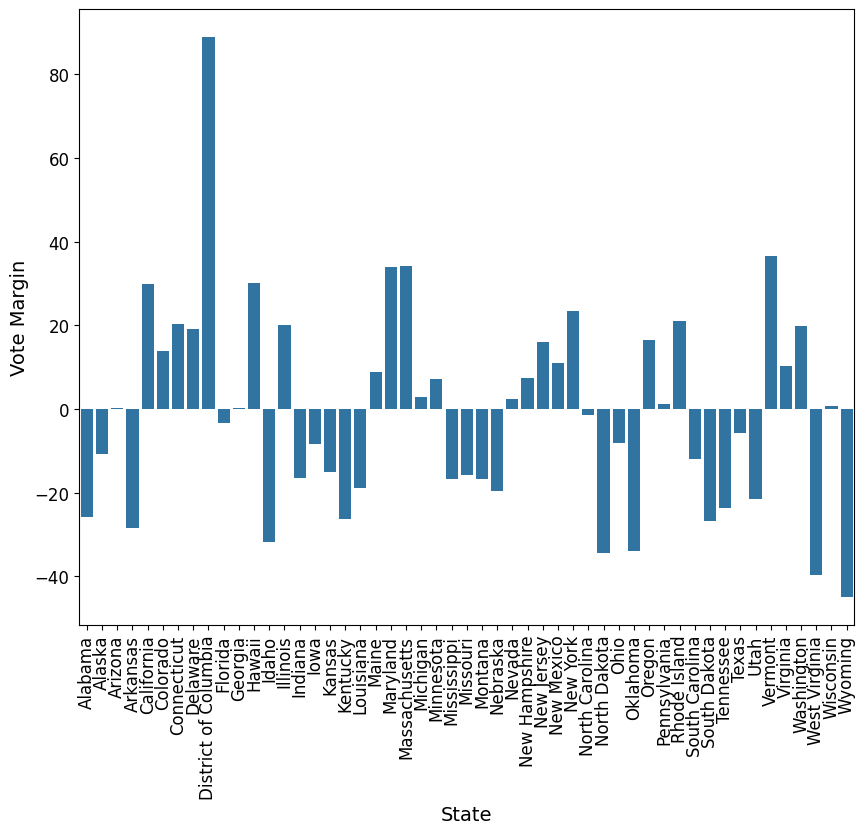

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'state', y = 'margin', data = df_president_county)
plt.xticks(rotation=90, fontsize=12)  # Increase font size for x-ticks
plt.yticks(fontsize=12)  # Increase font size for y-ticks
plt.xlabel('State', fontsize=14)  # Increase font size for x-label
plt.ylabel('Vote Margin', fontsize=14)  # Increase font size for y-label
plt.show()


* District of Columbia prefers most the democratic party over the republican party.
* Wyoming has the most votes for the republic party.


In [ ]:
fig = px.choropleth(df_president_county,
                    locations="usa_state_code",
                    color = "percent_democrat",
                    locationmode = 'USA-states',
                    hover_name="state",
                    range_color=[25,75],
                    color_continuous_scale = 'RdBu',#blues
                    scope="usa",
                    title='2020 USA Election: Percent of Population Voting for the Democratic Party')
fig.show()


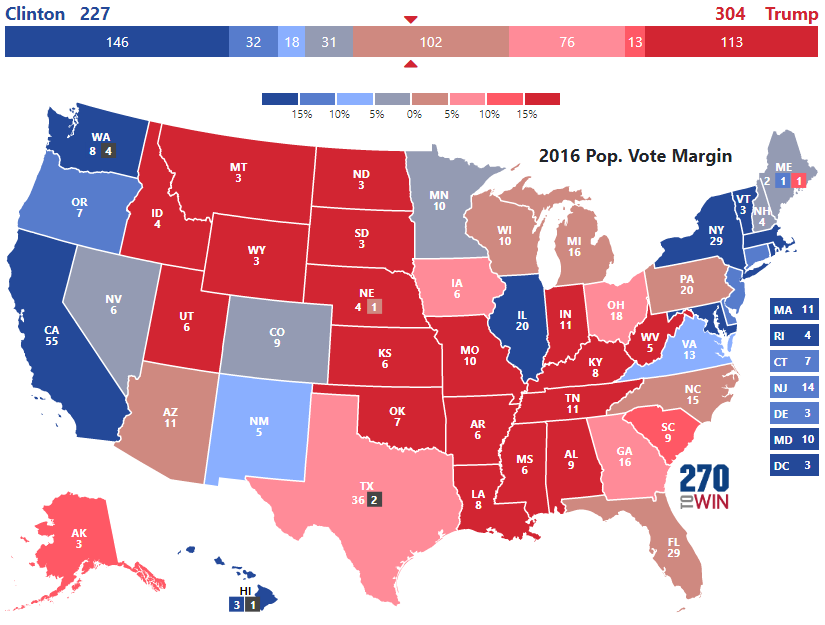

Swing States:
* Arizona (flipped from Republican in 2016 to Democratic in 2020)
* Georgia (flipped from Republican in 2016 to Democratic in 2020)
* Michigan (flipped from Republican in 2016 to Democratic in 2020)
* Pennsylvania (flipped from Republican in 2016 to Democratic in 2020)
* Wisconsin (flipped from Republican in 2016 to Democratic in 2020)




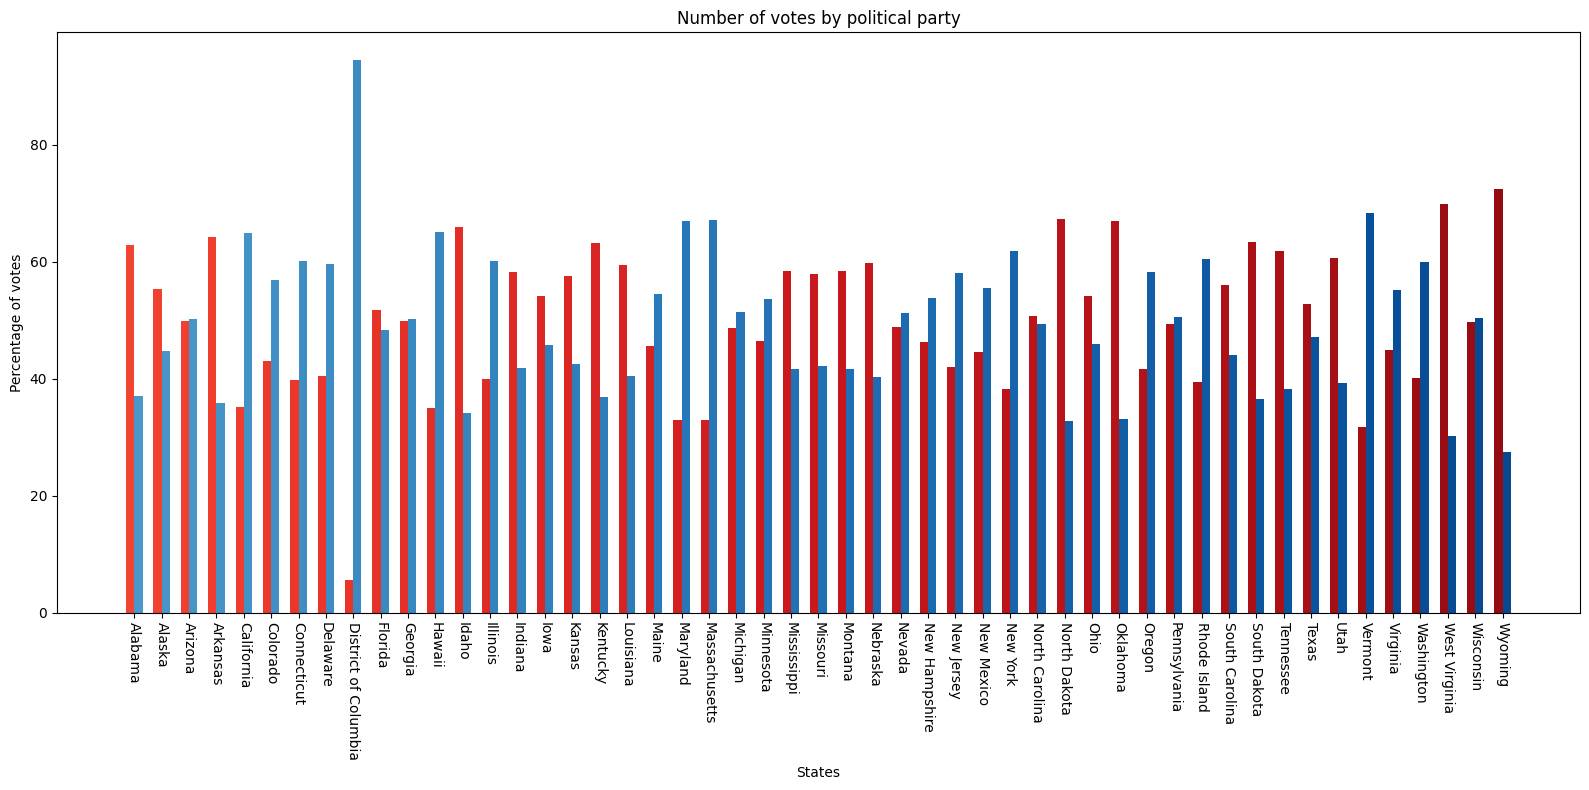

In [ ]:
color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

data1 = df_president_county['REP_votes_prec']
data2 = df_president_county['DEM_votes_prec']

plt.figure(figsize=(16,8))
x = np.arange(len(data1))  # Set x to match the length of data1
state_names = df_president_county['state'] # Assuming data1.index contains state names

ax1 = plt.subplot(1,1,1)
w = 0.3

plt.title('Number of votes by political party')
plt.xticks(x + w / 2, state_names, rotation=-90)  # Use state_names for x-axis labels
ax1.set_xlabel('States')
ax1.set_ylabel('Percentage of votes')

ax1.bar(x, data1.values, color=color_1, width=w, align='center')  # Plot REP votes
ax1.bar(x + w, data2.values, color=color_2, width=w, align='center')  # Plot DEM votes

plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()


In [ ]:
df_final = minmax_scaling(df, columns=df.columns)
df_final.head(5)

votes DEM president  votes REP president  \
state   county                                                     
Alabama Autauga County             0.002477             0.017318   
        Baldwin County             0.008115             0.072930   
        Barbour County             0.001590             0.004908   
        Bibb County                0.000656             0.006569   
        Blount County              0.000872             0.021572   

                        votes DEM senate  votes REP senate  \
state   county                                               
Alabama Autauga County          0.021644               0.0   
        Baldwin County          0.075639               0.0   
        Barbour County          0.013130               0.0   
        Bibb County             0.005868               0.0   
        Blount County           0.008603               0.0   

                        votes DEM governors  votes REP governors  TotalPop  \
state   county                                                               
Alabama Autauga County                  0.0                  0.0  0.005446   
        Baldwin County                  0.0                  0.0  0.020123   
        Barbour County                  0.0                  0.0  0.002593   
        Bibb County                     0.0                  0.0  0.002234   
        Blount County                   0.0                  0.0  0.005706   

                             Men     Women  Hispanic  ...  PublicWork  \
state   county                                        ...               
Alabama Autauga County  0.005402  0.005489  0.027218  ...    0.311728   
        Baldwin County  0.019987  0.020256  0.044355  ...    0.199074   
        Barbour County  0.002807  0.002385  0.042339  ...    0.294753   
        Bibb County     0.002460  0.002015  0.024194  ...    0.268519   
        Blount County   0.005721  0.005692  0.090726  ...    0.183642   

                        SelfEmployed  FamilyWork  Unemployment  \
state   county                                                   
Alabama Autauga County      0.147368      0.0125      0.181185   
        Baldwin County      0.165789      0.0125      0.191638   
        Barbour County      0.171053      0.0375      0.432056   
        Bibb County         0.165789      0.0375      0.285714   
        Blount County       0.105263      0.0125      0.170732   

                        votes REP president perc  votes DEM president perc  \
state   county                                                               
Alabama Autauga County                  0.725577                  0.274423   
        Baldwin County                  0.772683                  0.227317   
        Barbour County                  0.538609                  0.461391   
        Bibb County                     0.791189                  0.208811   
        Blount County                   0.903477                  0.096523   

                        votes REP senate perc  votes DEM senate perc  \
state   county                                                         
Alabama Autauga County                    0.0               0.294398   
        Baldwin County                    0.0               0.257182   
        Barbour County                    0.0               0.471765   
        Bibb County                       0.0               0.229706   
        Blount County                     0.0               0.117496   

                        votes REP governors perc  votes DEM governors perc  
state   county                                                              
Alabama Autauga County                       0.0                       0.0  
        Baldwin County                       0.0                       0.0  
        Barbour County                       0.0                       0.0  
        Bibb County                          0.0                       0.0  
        Blount County                        0.0                       0.0  

In [ ]:
df_final.columns

Index(['votes DEM president', 'votes REP president', 'votes DEM senate',
       'votes REP senate', 'votes DEM governors', 'votes REP governors',
       'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'votes REP president perc',
       'votes DEM president perc', 'votes REP senate perc',
       'votes DEM senate perc', 'votes REP governors perc',
       'votes DEM governors perc'],
      dtype='object')

## Statistical Testing

In [ ]:
import pandas as pd

# Example: Assuming the dataframe 'df_final' already contains your data
# Replace this with your actual dataset loading step if necessary:
# df_final = pd.read_csv('your_data.csv')

# List of known swing states (replace with your actual swing states list)
swing_states_list = ['Arizona', 'Georgia', 'Michigan', 'Pennsylvania', 'Wisconsin']

# Filter the dataset to include only the rows where the state (level 0) is in the swing states list
swing_states_df = df_final[df_final.index.get_level_values(0).isin(swing_states_list)]

# Display the filtered dataset for swing states
print(swing_states_df[['votes DEM president perc', 'votes REP president perc']])

# If you want to focus on specific columns (e.g., demographic data or party affiliation), you can extract those:
# For example, extracting income and demographic info for swing states:
swing_states_demo = swing_states_df[['Income', 'Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women']]
print(swing_states_demo)


                            votes DEM president perc  votes REP president perc
state     county                                                              
Arizona   Apache County                     0.670592                  0.329408
          Cochise County                    0.400277                  0.599723
          Coconino County                   0.622969                  0.377031
          Gila County                       0.327343                  0.672657
          Graham County                     0.272881                  0.727119
...                                              ...                       ...
Wisconsin Waukesha County                   0.394248                  0.605752
          Waupaca County                    0.338615                  0.661385
          Waushara County                   0.327365                  0.672635
          Winnebago County                  0.479664                  0.520336
          Wood County                       0.402355

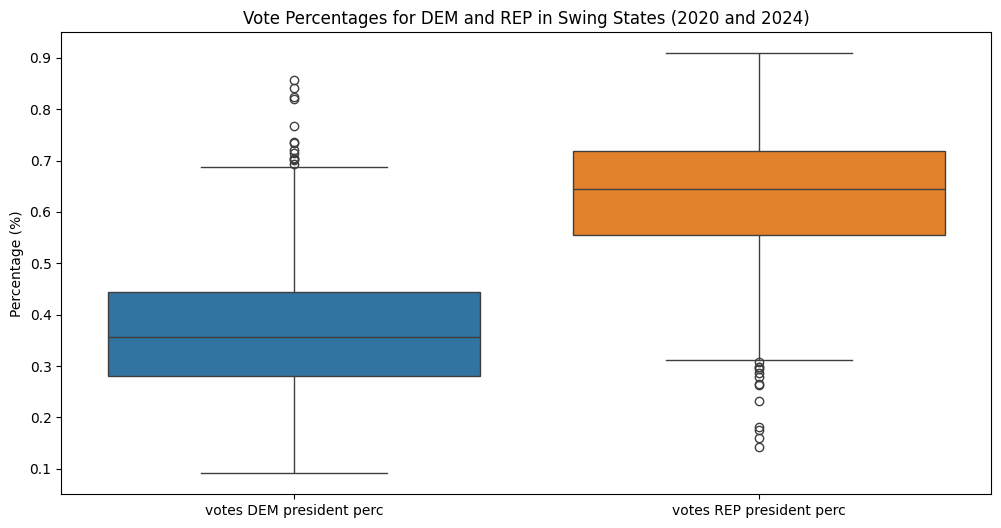

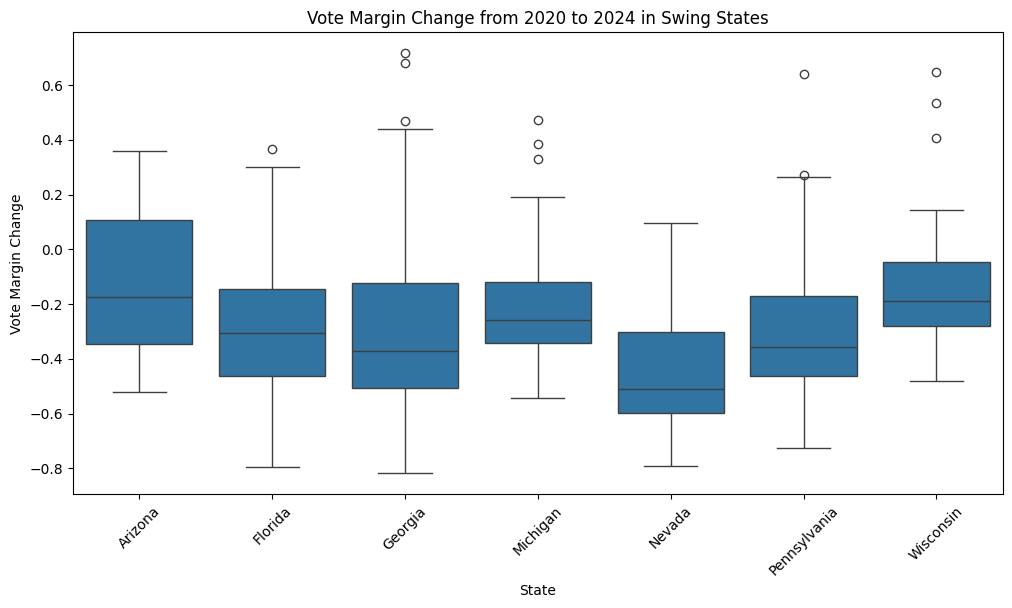

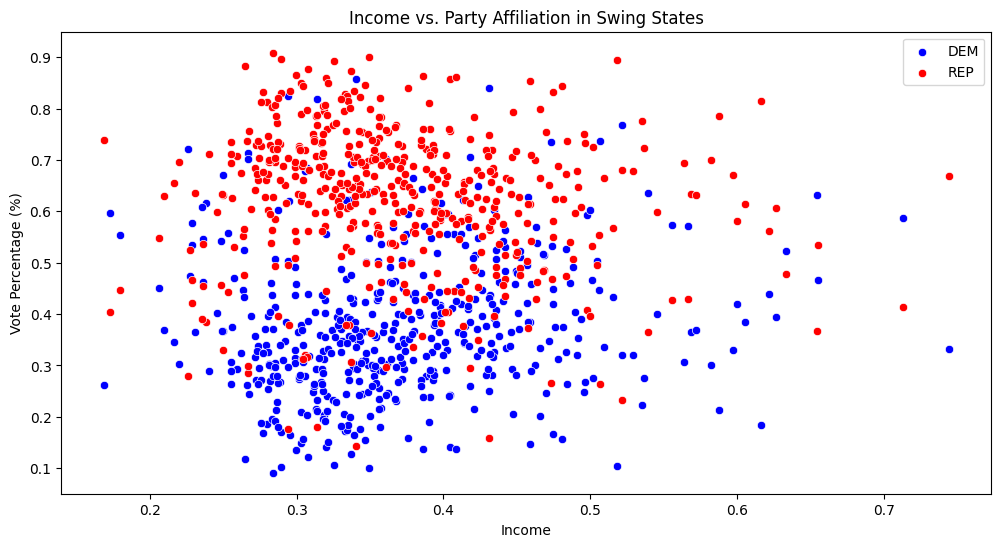

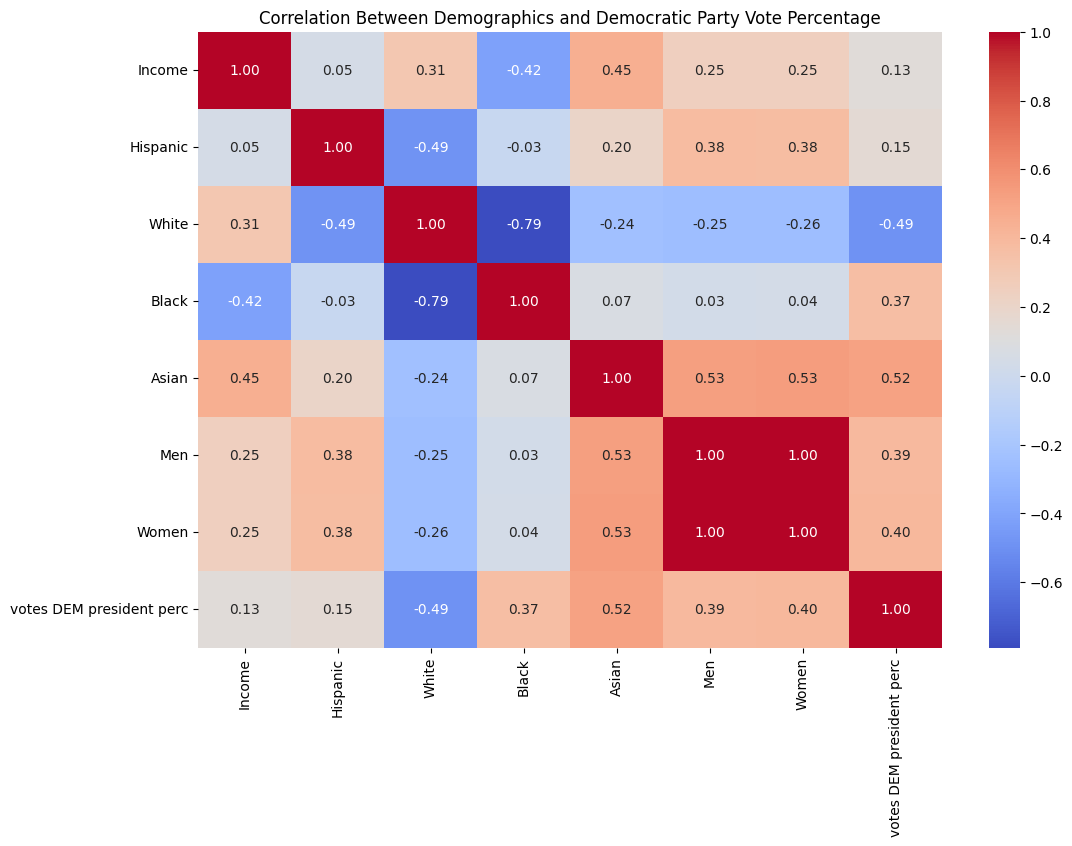

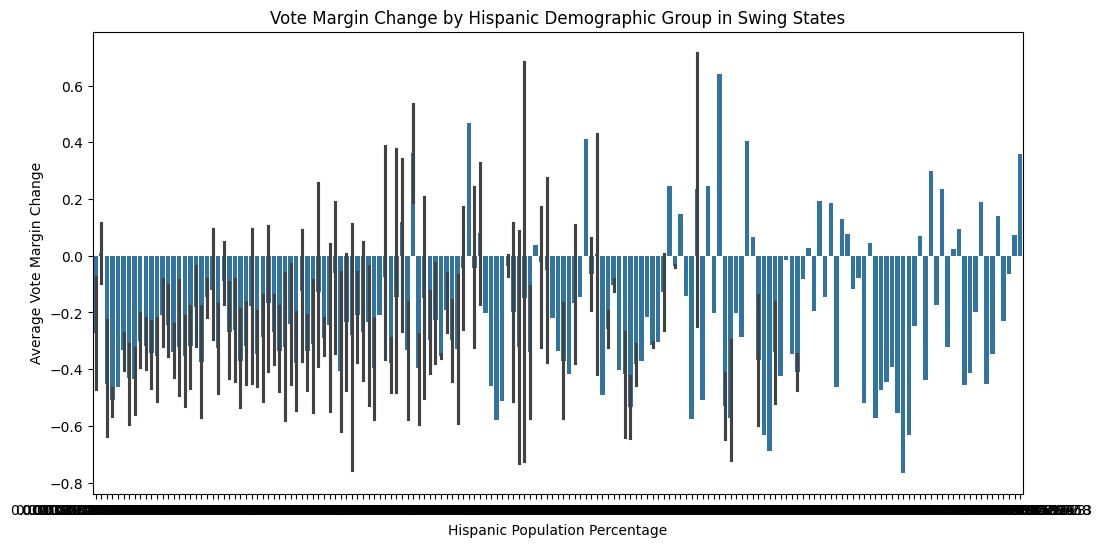

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your dataset with multi-level index ('state', 'county')

# List of known swing states (replace with your actual swing states list)
swing_states_list = ['Florida', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Arizona', 'Georgia', 'Nevada']

# Filter the dataset to include only the rows where the state (level 0) is in the swing states list
swing_states_df = df_final[df_final.index.get_level_values(0).isin(swing_states_list)]

# 1. Voting Behavior in Swing States
# Plot the voting percentages for 2020 and 2024 for DEM and REP parties
plt.figure(figsize=(12, 6))
sns.boxplot(data=swing_states_df[['votes DEM president perc', 'votes REP president perc']])
plt.title("Vote Percentages for DEM and REP in Swing States (2020 and 2024)")
plt.ylabel("Percentage (%)")
plt.show()

# 2. Vote Margin Change from 2020 to 2024 in Swing States
swing_states_df['vote_margin_change'] = swing_states_df['votes DEM president perc'] - swing_states_df['votes REP president perc']
plt.figure(figsize=(12, 6))
sns.boxplot(x=swing_states_df.index.get_level_values(0), y=swing_states_df['vote_margin_change'])
plt.title("Vote Margin Change from 2020 to 2024 in Swing States")
plt.xlabel("State")
plt.ylabel("Vote Margin Change")
plt.xticks(rotation=45)
plt.show()

# 3. Demographic Breakdown: Income and Party Affiliation
# Income vs. Party Affiliation in Swing States (Democratic and Republican)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=swing_states_df['Income'], y=swing_states_df['votes DEM president perc'], color='blue', label='DEM')
sns.scatterplot(x=swing_states_df['Income'], y=swing_states_df['votes REP president perc'], color='red', label='REP')
plt.title("Income vs. Party Affiliation in Swing States")
plt.xlabel("Income")
plt.ylabel("Vote Percentage (%)")
plt.legend()
plt.show()

# 4. Correlation of Demographics and Party Affiliation
# Checking correlation between demographic factors and vote percentage for DEM party
dem_corr = swing_states_df[['Income', 'Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women', 'votes DEM president perc']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(dem_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Demographics and Democratic Party Vote Percentage")
plt.show()

# 5. Analyze Vote Margin Change by Demographic Group
# Grouping by demographic categories and analyzing the average vote margin change
swing_states_demo = swing_states_df[['Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women', 'vote_margin_change']]
demo_vote_margin = swing_states_demo.groupby(['Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women']).mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hispanic', y='vote_margin_change', data=demo_vote_margin)
plt.title("Vote Margin Change by Hispanic Demographic Group in Swing States")
plt.xlabel("Hispanic Population Percentage")
plt.ylabel("Average Vote Margin Change")
plt.show()


T-Test (Men vs Women DEM Votes): T-Statistic: -0.00, P-value: 0.9965
Optimization terminated successfully.
         Current function value: 0.514734
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4633
Model:                          Logit   Df Residuals:                     4630
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1628
Time:                        05:34:26   Log-Likelihood:                -2384.8
converged:                       True   LL-Null:                       -2848.6
Covariance Type:            nonrobust   LLR p-value:                3.576e-202
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3419      0.051     -6

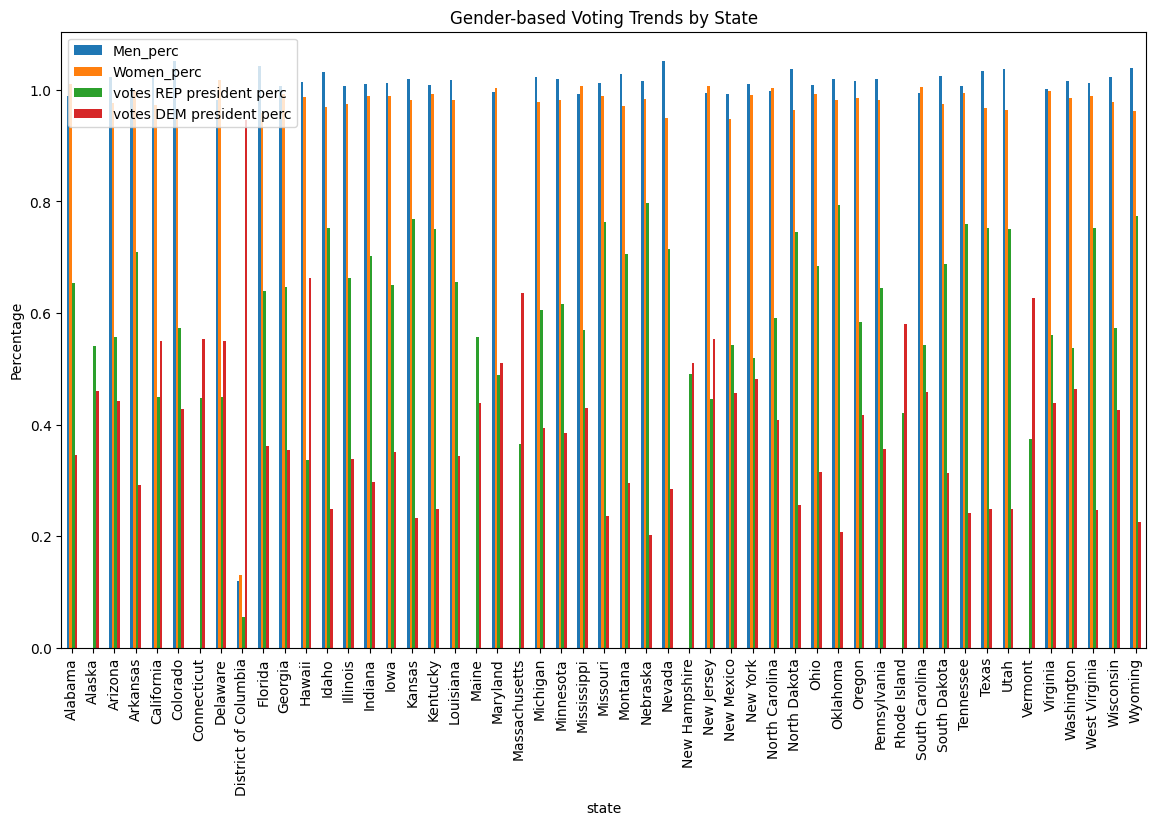

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Load the dataset
df = df_final

# Preprocessing
# Normalize population metrics
df['Men_perc'] = df['Men'] / df['TotalPop']
df['Women_perc'] = df['Women'] / df['TotalPop']

# Fill missing values with 0
df.fillna(0, inplace=True)

# Gender Gap Analysis
df['gender_gap_pres'] = df['votes REP president perc'] - df['votes DEM president perc']

# 1. Gender Analysis (T-Test)
# Compare Democratic voting percentages between predominantly male vs. female counties
t_stat, p_value_ttest = ttest_ind(
    df[df['Men_perc'] > 0.5]['votes DEM president perc'],
    df[df['Women_perc'] > 0.5]['votes DEM president perc']
)
print(f"T-Test (Men vs Women DEM Votes): T-Statistic: {t_stat:.2f}, P-value: {p_value_ttest:.4f}")

# 2. Logistic Regression
# Predict likelihood of voting Republican based on gender proportions
features = df[['Men_perc', 'Women_perc']]
target = (df['votes REP president perc'] > df['votes DEM president perc']).astype(int)
features = sm.add_constant(features)
model = sm.Logit(target, features).fit()
print(model.summary())

# 3. Visualization
# Gender-based Voting Trends
gender_trend = df.groupby('state')[['Men_perc', 'Women_perc', 'votes REP president perc', 'votes DEM president perc']].mean()
gender_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Gender-based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


T-Test (High vs Low Hispanic REP Votes): T-Statistic: 42.03, P-value: 0.0000
Optimization terminated successfully.
         Current function value: 0.597062
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4633
Model:                          Logit   Df Residuals:                     4629
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.02893
Time:                        05:34:27   Log-Likelihood:                -2766.2
converged:                       True   LL-Null:                       -2848.6
Covariance Type:            nonrobust   LLR p-value:                 1.650e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6391 

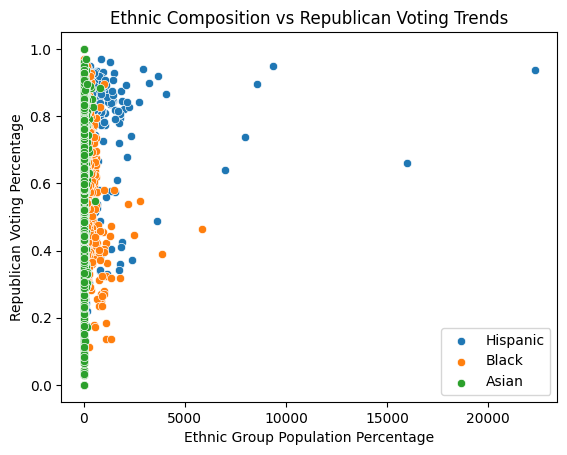

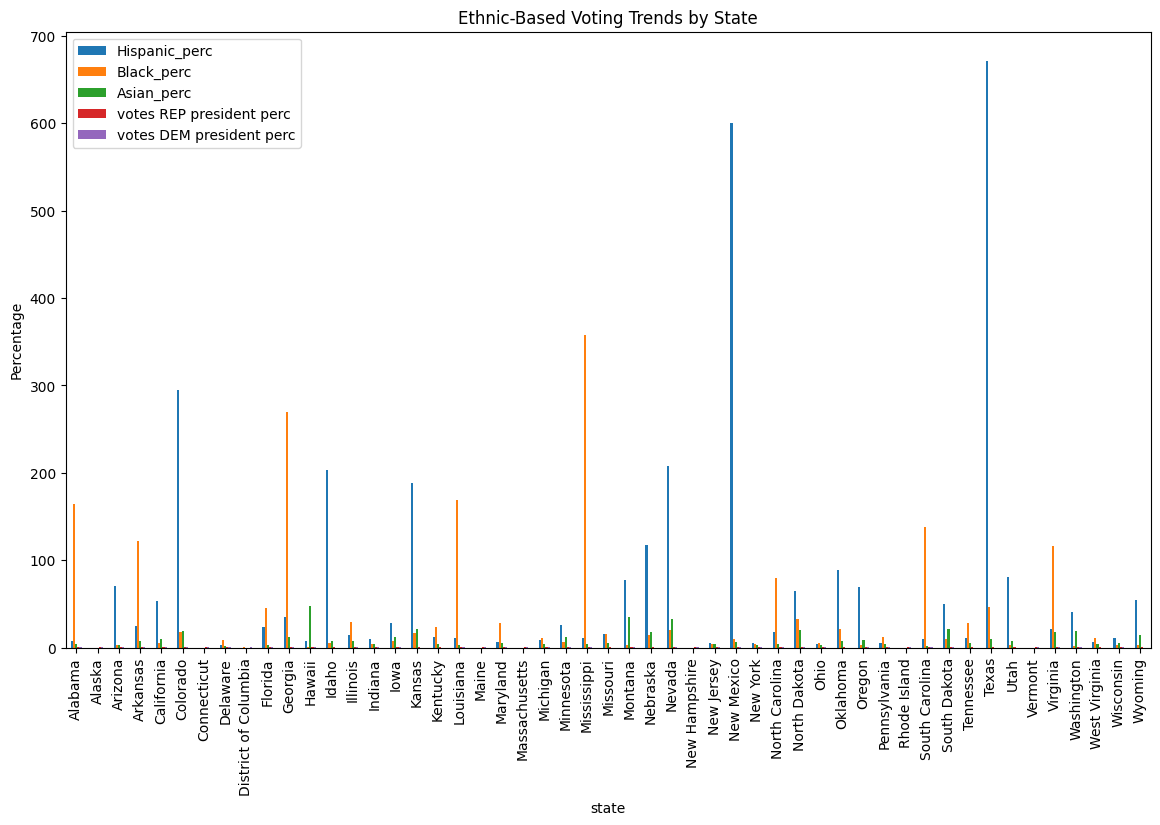

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Load the dataset
df = df_final

# Preprocessing
# Normalize population metrics
df['Men_perc'] = df['Men'] / df['TotalPop']
df['Women_perc'] = df['Women'] / df['TotalPop']
df['Hispanic_perc'] = df['Hispanic'] / df['TotalPop']
df['Black_perc'] = df['Black'] / df['TotalPop']
df['Asian_perc'] = df['Asian'] / df['TotalPop']

# Fill missing values with 0
df.fillna(0, inplace=True)

# Ethnic Analysis
# 1. T-Test: Compare Republican voting percentages for counties with high vs. low Hispanic population
threshold = 0.3  # Example threshold for significant Hispanic population
t_stat_hispanic, p_value_hispanic = ttest_ind(
    df[df['Hispanic_perc'] > threshold]['votes REP president perc'],
    df[df['Hispanic_perc'] <= threshold]['votes REP president perc']
)
print(f"T-Test (High vs Low Hispanic REP Votes): T-Statistic: {t_stat_hispanic:.2f}, P-value: {p_value_hispanic:.4f}")

# 2. Logistic Regression: Predict Republican voting likelihood based on ethnicity proportions
features_ethnicity = df[['Hispanic_perc', 'Black_perc', 'Asian_perc']]
target_ethnicity = (df['votes REP president perc'] > df['votes DEM president perc']).astype(int)
features_ethnicity = sm.add_constant(features_ethnicity)
model_ethnicity = sm.Logit(target_ethnicity, features_ethnicity).fit()
print(model_ethnicity.summary())

# 3. Visualization: Ethnic Composition vs Voting Trends
sns.scatterplot(data=df, x='Hispanic_perc', y='votes REP president perc', label='Hispanic')
sns.scatterplot(data=df, x='Black_perc', y='votes REP president perc', label='Black')
sns.scatterplot(data=df, x='Asian_perc', y='votes REP president perc', label='Asian')
plt.title('Ethnic Composition vs Republican Voting Trends')
plt.xlabel('Ethnic Group Population Percentage')
plt.ylabel('Republican Voting Percentage')
plt.legend()
plt.show()

# 4. State-Level Ethnic Voting Trends
ethnic_trend = df.groupby('state')[['Hispanic_perc', 'Black_perc', 'Asian_perc', 'votes REP president perc', 'votes DEM president perc']].mean()
ethnic_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Ethnic-Based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


T-Test (High vs Low Hispanic REP Votes): T-Statistic: 42.03, P-value: 0.0000
Optimization terminated successfully.
         Current function value: 0.597062
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4633
Model:                          Logit   Df Residuals:                     4629
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Dec 2024   Pseudo R-squ.:                 0.02893
Time:                        18:09:19   Log-Likelihood:                -2766.2
converged:                       True   LL-Null:                       -2848.6
Covariance Type:            nonrobust   LLR p-value:                 1.650e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6391 

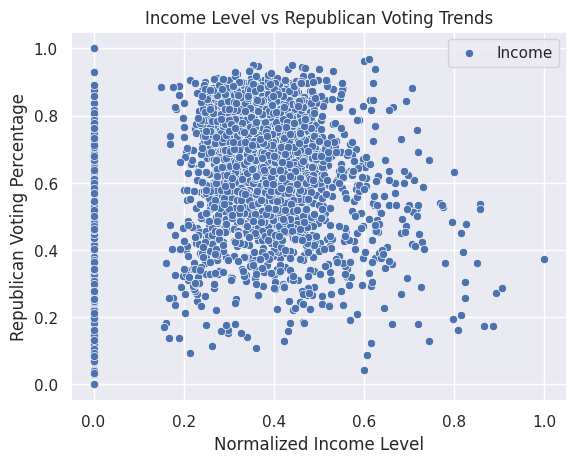

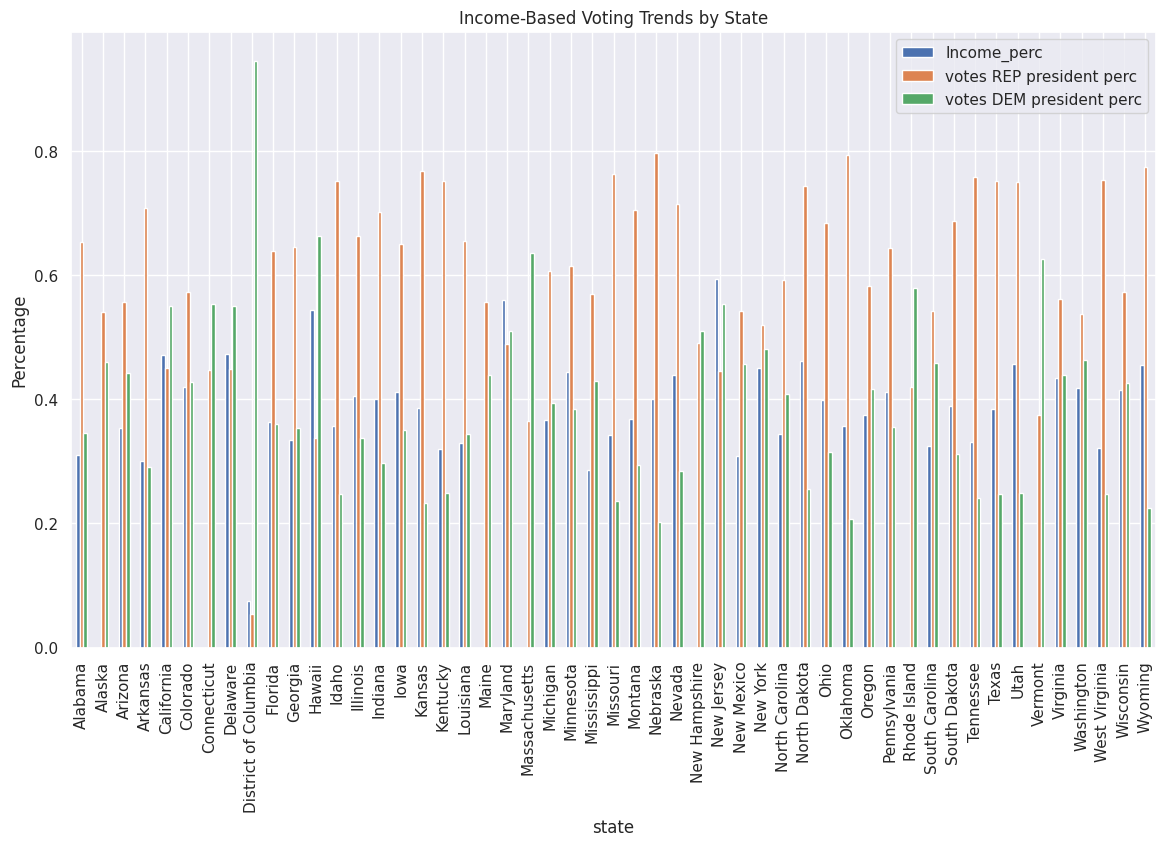

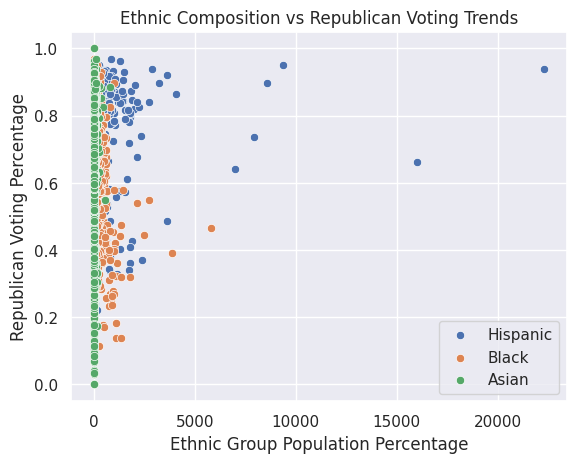

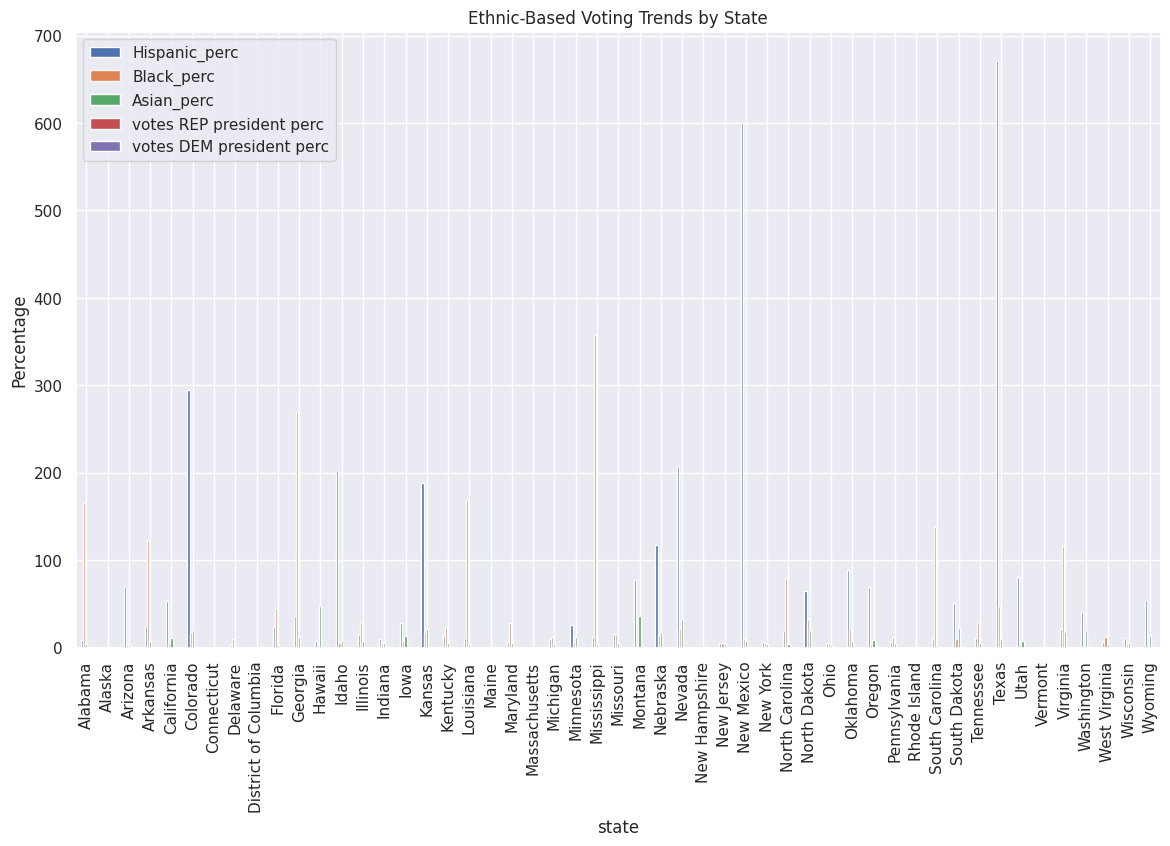

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm


df = df_final


df['Men_perc'] = df['Men'] / df['TotalPop']
df['Women_perc'] = df['Women'] / df['TotalPop']
df['Hispanic_perc'] = df['Hispanic'] / df['TotalPop']
df['Black_perc'] = df['Black'] / df['TotalPop']
df['Asian_perc'] = df['Asian'] / df['TotalPop']
df['Income_perc'] = df['Income'] / df['Income'].max()  # Normalize income


df.fillna(0, inplace=True)


t_stat_hispanic, p_value_hispanic = ttest_ind(
    df[df['Hispanic_perc'] > threshold]['votes REP president perc'],
    df[df['Hispanic_perc'] <= threshold]['votes REP president perc']
)
print(f"T-Test (High vs Low Hispanic REP Votes): T-Statistic: {t_stat_hispanic:.2f}, P-value: {p_value_hispanic:.4f}")


features_ethnicity = df[['Hispanic_perc', 'Black_perc', 'Asian_perc']]
target_ethnicity = (df['votes REP president perc'] > df['votes DEM president perc']).astype(int)
features_ethnicity = sm.add_constant(features_ethnicity)
model_ethnicity = sm.Logit(target_ethnicity, features_ethnicity).fit()
print(model_ethnicity.summary())


income_threshold = 0.5  # Median income threshold
t_stat_income, p_value_income = ttest_ind(
    df[df['Income_perc'] > income_threshold]['votes REP president perc'],
    df[df['Income_perc'] <= income_threshold]['votes REP president perc']
)
print(f"T-Test (High vs Low Income REP Votes): T-Statistic: {t_stat_income:.2f}, P-value: {p_value_income:.4f}")

features_income = df[['Income_perc']]
target_income = (df['votes REP president perc'] > df['votes DEM president perc']).astype(int)
features_income = sm.add_constant(features_income)
model_income = sm.Logit(target_income, features_income).fit()
print(model_income.summary())

sns.scatterplot(data=df, x='Income_perc', y='votes REP president perc', label='Income')
plt.title('Income Level vs Republican Voting Trends')
plt.xlabel('Normalized Income Level')
plt.ylabel('Republican Voting Percentage')
plt.legend()
plt.show()


income_trend = df.groupby('state')[['Income_perc', 'votes REP president perc', 'votes DEM president perc']].mean()
income_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Income-Based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


sns.scatterplot(data=df, x='Hispanic_perc', y='votes REP president perc', label='Hispanic')
sns.scatterplot(data=df, x='Black_perc', y='votes REP president perc', label='Black')
sns.scatterplot(data=df, x='Asian_perc', y='votes REP president perc', label='Asian')
plt.title('Ethnic Composition vs Republican Voting Trends')
plt.xlabel('Ethnic Group Population Percentage')
plt.ylabel('Republican Voting Percentage')
plt.legend()
plt.show()


ethnic_trend = df.groupby('state')[['Hispanic_perc', 'Black_perc', 'Asian_perc', 'votes REP president perc', 'votes DEM president perc']].mean()
ethnic_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Ethnic-Based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


## PCA

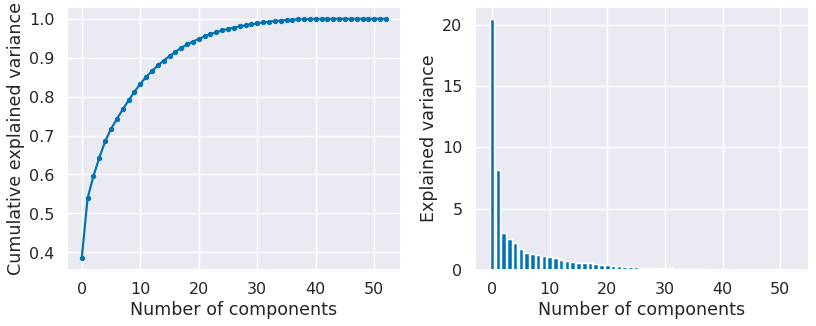

In [ ]:


# Assuming df_final is your dataset, we'll first select only numeric columns
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Exclude non-numeric columns
df_numeric = df_final[numeric_columns]

# Handle missing values (e.g., fill with mean or drop rows with missing values)
df_numeric = df_numeric.fillna(df_numeric.mean())  # Fill missing values with column mean

# Standardize the data (PCA is sensitive to the scale of the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Create the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')

# Plot the cumulative explained variance ratio
ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance')

# Plot the explained variance for each component
ax1.bar(range(df_numeric.shape[1]), pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')

# Display the plot
plt.tight_layout()
plt.show()


How many PC's we need:

In [ ]:
n_PCA_90 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.9) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.9)
print("Already: " + format(n_PCA_90) + " components cover 90% of variance.")

Already: 15 components cover 90% of variance.


Good result for linear transformation. Breaking it down further. I want to check what variables contribute the most to these top 5 components:

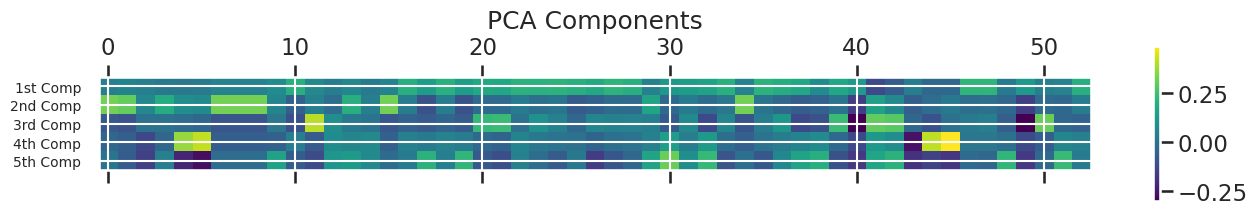

Explained Variance Ratio: [0.38541942 0.1540519  0.05607385 0.04772997 0.04176666]


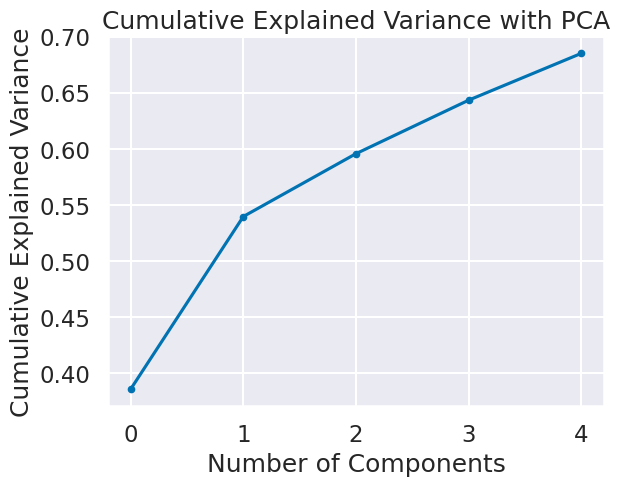

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_final is your dataset

# Select only numeric columns
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Exclude non-numeric columns from df_final
df_numeric = df_final[numeric_columns]

# Handle missing values (e.g., fill with the mean or drop rows with missing values)
df_numeric = df_numeric.fillna(df_numeric.mean())  # Fill missing values with the column mean

# Standardize the data (PCA is sensitive to the scale of the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA with 5 components
pca = PCA(n_components=5)
pca.fit(df_scaled)

# Transform the data to the principal components
X_pca = pca.transform(df_scaled)

# Visualizing the components
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ['1st Comp', '2nd Comp', '3rd Comp', '4th Comp', '5th Comp'], fontsize=10)
plt.colorbar()
plt.title('PCA Components')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance with PCA')
plt.show()


Presenting it in table, only the most contributing variables:

In [ ]:
import pandas as pd

# Initialize the list to store the maximum absolute contribution for each feature
PCA_vars = [0] * len(df_final.columns)

# Extract the column from PCA components
def ExtractColumn(lst, j):
    return [item[j] for item in lst]

# Loop over the features of the dataset (the number of features in df_final)
for i, feature in zip(range(len(df_final.columns)), df_final.columns):
    # Make sure we're within the bounds of the number of components
    if i < pca.components_.shape[1]:
        x = ExtractColumn(pca.components_, i)
        if ((max(x) > 0.2) | (min(x) < -0.2)):
            if abs(max(x)) > abs(min(x)):
                PCA_vars[i] = max(x)
            else:
                PCA_vars[i] = min(x)
        else:
            PCA_vars[i] = 0

# Create the PCA variables DataFrame
PCA_vars_df = pd.DataFrame(list(zip(df_final.columns, PCA_vars)), columns=('Name', 'Max absolute contribution'), index=range(1, len(df_final.columns) + 1))

# Filter out the zero contributions and sort the DataFrame
PCA_vars_df = PCA_vars_df[(PCA_vars_df['Max absolute contribution'] != 0)].sort_values(by='Max absolute contribution', ascending=False)

# Display the result
PCA_vars_df


,Name,Max absolute contribution
46,votes DEM governors perc,0.493435
6,votes REP governors,0.420859
45,votes REP governors perc,0.416266
12,Black,0.411380
5,votes DEM governors,0.369525
16,VotingAgeCitizen,0.328069
35,Employed,0.327971
9,Women,0.326903
7,TotalPop,0.326749
1,votes DEM president,0.326546
